# Cricket Analysis Test

#### This is a test notebook to perform data analysis on a static table of data from *play-cricket.com*. Firstly I will be cleaning the data to get it ready for data analysis.

In [4]:
# Importing data analysis modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading in the dataframe using pandas
df = pd.read_csv("All players batting 2024.csv", index_col="Rank")
df

,Player,GAMES,INNS,NOT OUTS,RUNS,HIGH SCORE,High Score Not Out,AVG,50s,100s,STRIKE RATE
Rank,,,,,,,,,,,
1,James Burgess,21,20,7,574,101,Yes,44.15,3,1,88.27
2,Vivin Mathew,13,13,2,458,85,No,41.64,3,0,77.24
3,Darren McGoldrick,13,13,1,414,68,No,34.5,3,0,89
4,Tommy Howton,20,18,6,372,55,Yes,31,1,0,95.38
5,shahrokh navaee,10,10,2,311,92,Yes,38.88,2,0,95.35
6,Daniel Cadd,17,15,3,239,52,Yes,19.92,1,0,79.75
7,Euan Stoddart,21,21,3,218,94,No,12.11,1,0,77.46
8,Mark Whiting,14,14,1,217,50,Yes,16.69,1,0,32.99
9,Alexander Priest,25,20,2,192,37,No,10.67,0,0,67.58


In [6]:
# Dropping column not needed for data analysis
df.drop('High Score Not Out', axis=1, inplace=True)
df.head()

,Player,GAMES,INNS,NOT OUTS,RUNS,HIGH SCORE,AVG,50s,100s,STRIKE RATE
Rank,,,,,,,,,,
1,James Burgess,21,20,7,574,101,44.15,3,1,88.27
2,Vivin Mathew,13,13,2,458,85,41.64,3,0,77.24
3,Darren McGoldrick,13,13,1,414,68,34.5,3,0,89
4,Tommy Howton,20,18,6,372,55,31,1,0,95.38
5,shahrokh navaee,10,10,2,311,92,38.88,2,0,95.35


In [7]:
# Check data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 1 to 39
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Player       39 non-null     object
 1   GAMES        39 non-null     int64 
 2   INNS         39 non-null     int64 
 3   NOT OUTS     39 non-null     int64 
 4   RUNS         39 non-null     int64 
 5   HIGH SCORE   39 non-null     int64 
 6   AVG          39 non-null     object
 7   50s          39 non-null     int64 
 8   100s         39 non-null     int64 
 9   STRIKE RATE  39 non-null     object
dtypes: int64(7), object(3)
memory usage: 3.4+ KB


In [8]:
# Changing object data type to float in order to perform data analysis
df['AVG'] = pd.to_numeric(df['AVG'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 1 to 39
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       39 non-null     object 
 1   GAMES        39 non-null     int64  
 2   INNS         39 non-null     int64  
 3   NOT OUTS     39 non-null     int64  
 4   RUNS         39 non-null     int64  
 5   HIGH SCORE   39 non-null     int64  
 6   AVG          38 non-null     float64
 7   50s          39 non-null     int64  
 8   100s         39 non-null     int64  
 9   STRIKE RATE  39 non-null     object 
dtypes: float64(1), int64(7), object(2)
memory usage: 3.4+ KB


In [9]:
# Gathering extra statistics using describe function
df.describe()

,GAMES,INNS,NOT OUTS,RUNS,HIGH SCORE,AVG,50s,100s
count,39.000000,39.000000,39.000000,39.000000,39.000000,38.000000,39.000000,39.000000
mean,12.512821,10.076923,2.358974,140.205128,37.564103,17.875000,0.487179,0.025641
std,6.640671,5.564855,2.058195,132.284418,26.437409,13.766261,0.884718,0.160128
min,3.000000,3.000000,0.000000,1.000000,1.000000,0.500000,0.000000,0.000000
25%,6.500000,4.000000,1.000000,48.500000,18.500000,9.845000,0.000000,0.000000
50%,13.000000,10.000000,2.000000,114.000000,31.000000,14.535000,0.000000,0.000000
75%,17.000000,13.500000,3.500000,181.500000,51.500000,21.500000,1.000000,0.000000
max,31.000000,21.000000,8.000000,574.000000,101.000000,71.000000,3.000000,1.000000


In [10]:
# Getting the shape of the dataframe (rows, columns)
df.shape

(39, 10)

In [11]:
# Identifying missing values
df.isnull().sum()

Player         0
GAMES          0
INNS           0
NOT OUTS       0
RUNS           0
HIGH SCORE     0
AVG            1
50s            0
100s           0
STRIKE RATE    0
dtype: int64

In [12]:
# Replacing the missing value with a zero
df = df.fillna(0)
df.isnull().sum()

Player         0
GAMES          0
INNS           0
NOT OUTS       0
RUNS           0
HIGH SCORE     0
AVG            0
50s            0
100s           0
STRIKE RATE    0
dtype: int64

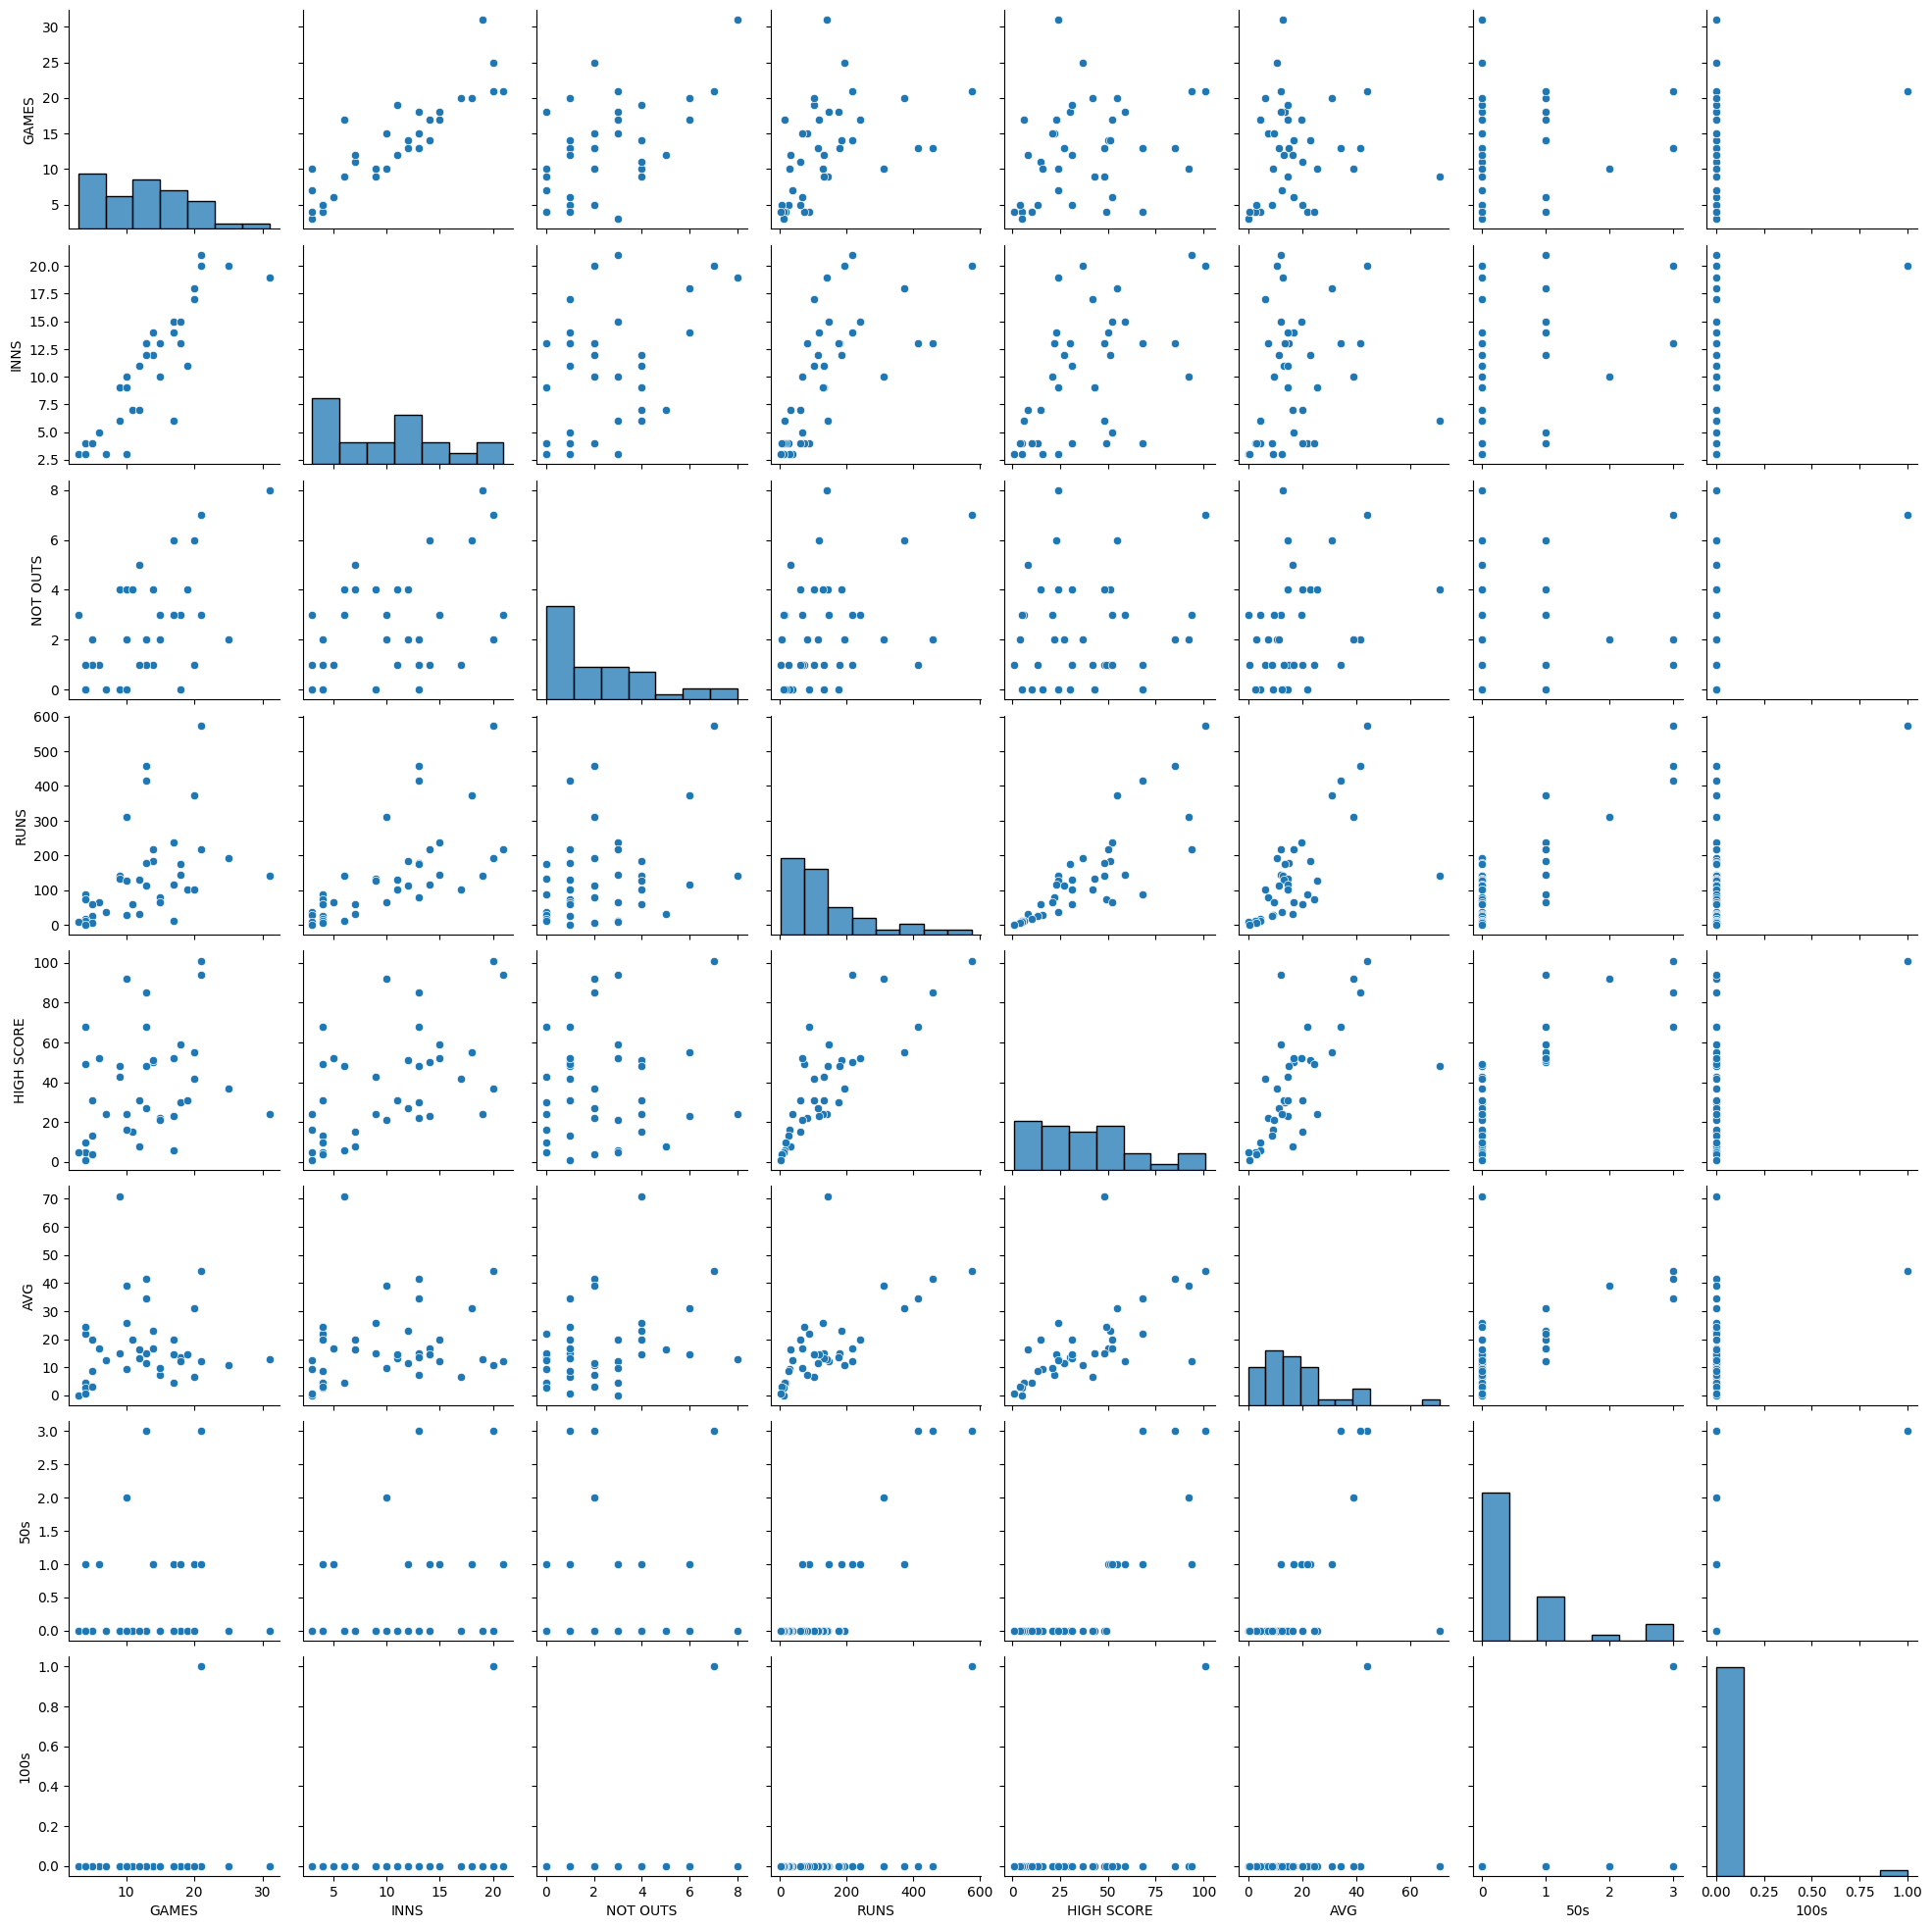

In [13]:
numeric_df = df.drop('Player', axis=1)
sns.pairplot(numeric_df)

In [14]:
correlation = numeric_df.corr()
sns.heatmap(correlation, cmap="viridis")

ValueError: could not convert string to float: '-'

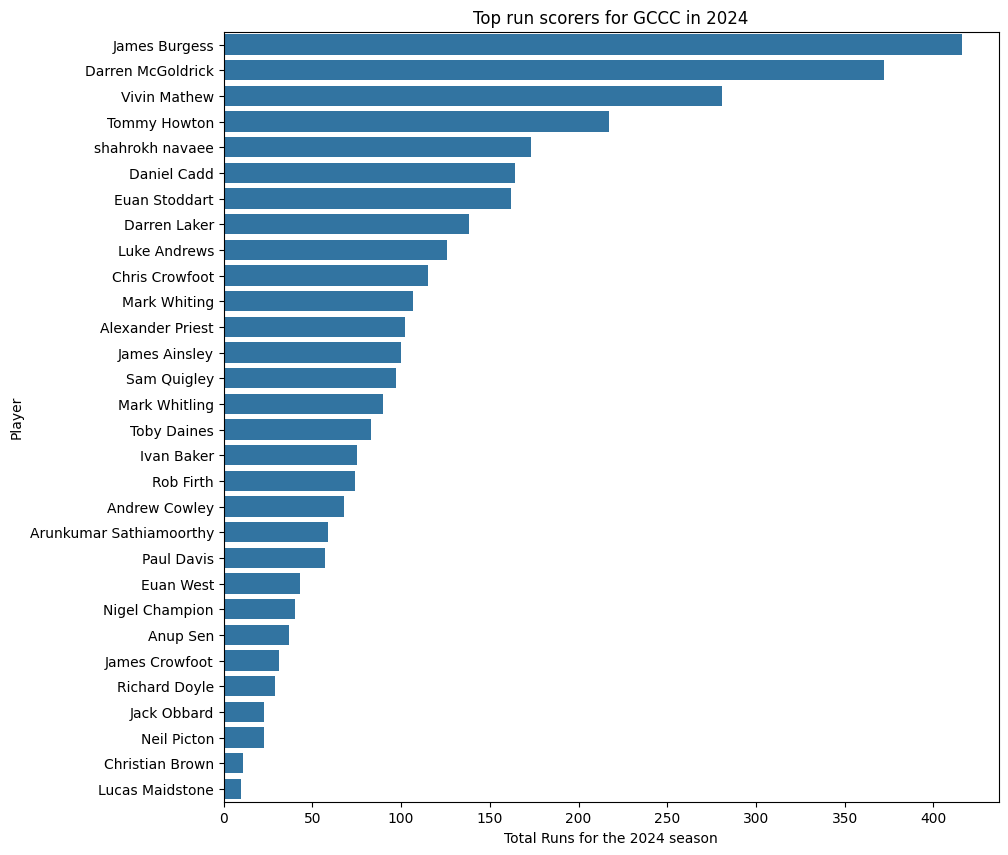

In [12]:
# Creating barplot to show runs of each player
fig = plt.figure(figsize=(10, 10))
sns.barplot(y=df['Player'], x=df['RUNS'], data=df)
plt.xlabel('Total Runs for the 2024 season')
plt.title('Top run scorers for GCCC in 2024')
plt.show()

<Axes: xlabel='GAMES', ylabel='HIGH SCORE'>

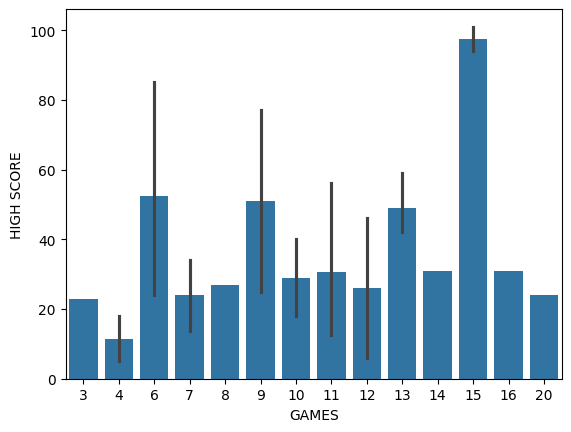

In [18]:
# How number of games played affects high score
df_played = df.groupby("GAMES")
sns.barplot(data=df, x=df["GAMES"], y=df["HIGH SCORE"])